In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<matplotlib.colorbar.Colorbar instance at 0x11c71d830>

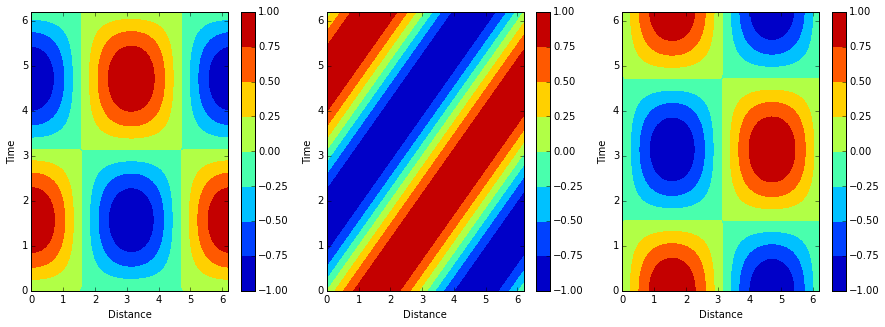

In [83]:
x = np.arange(0,2*np.pi,0.1)
t = np.arange(0,2*np.pi,0.1)
xf, tf = np.meshgrid(x,t)

eta1 = -np.cos(xf)*np.sin(-tf)
eta2 = np.sin(xf-tf)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.contourf(x,t,eta1)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.colorbar()
plt.subplot(1,3,2)
plt.contourf(x,t,eta2)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.colorbar()
plt.subplot(1,3,3)
plt.contourf(x,t,eta1+eta2)
plt.xlabel('Distance')
plt.ylabel('Time')
plt.colorbar()

In [41]:
c = np.sqrt(67 * 9.8)
omega = 2 * np.pi / (12.4*3600.)
ke = omega / c
lamb = 2 * np.pi / ke
print (lamb/2./1000, 'maximum variation distance in km')

(571.93230704341227, 'maximum variation distance in km')


<matplotlib.colorbar.Colorbar instance at 0x1391b5098>

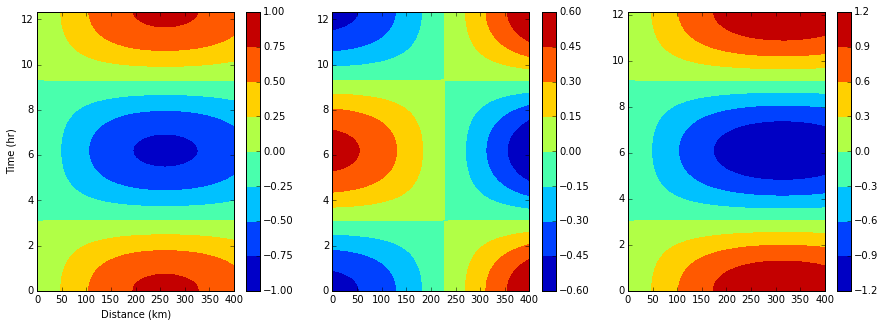

In [142]:
L = 400e3
x = np.arange(0,L*1.05,0.05*L)
t = np.arange(0,2*np.pi,0.05) / omega
Kappa = 0.29 * omega
xf, tf = np.meshgrid(x,t)
eta = (-np.cos(ke * xf) * np.sin(-omega * tf) + np.sin(ke * xf - omega * tf)) * np.exp(- Kappa * xf / (2*c))
etaimage = (( - np.cos(ke * (2*L - xf)) * np.sin(- omega * tf)
            + sin(ke *(2*L - xf) - omega * tf) )
            * np.exp(- Kappa * (2*L - xf) / (2*c)) )
etaimage2 = (( -np.cos(ke * (2*L + xf)) * np.sin(-omega * tf)
             + sin(ke * (2*L + xf) - omega * tf) )
            * np.exp(- Kappa * (2*L + xf) / (2*c)) )
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.contourf(x/1000., t/3600., eta)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
plt.subplot(1,3,2)
plt.contourf(xf/1000., tf/3600., etaimage)
plt.colorbar()
plt.subplot(1,3,3)
plt.contourf(xf/1000., tf/3660., eta + etaimage - etaimage2)
plt.colorbar()

Maximum impact in at head of domain.

Note that it is completely a standing wave. 

[14 16 19 22 27 33 40 46 51 55 58 60 62 63 64 65 66 67 68 68 69]


<matplotlib.colorbar.Colorbar instance at 0x13f9b2128>

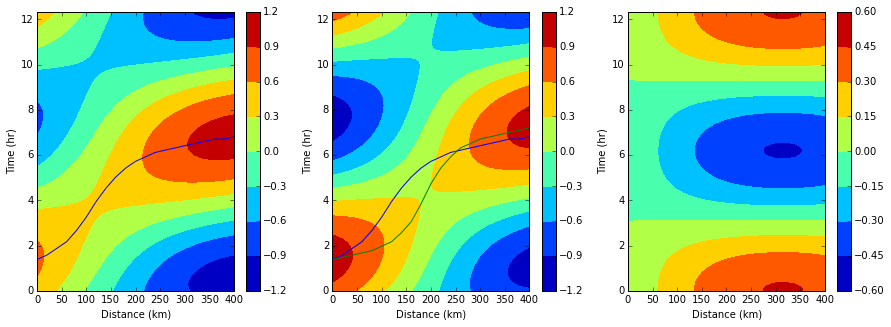

In [152]:
x = np.arange(0,L*1.05,0.05*L)
t = np.arange(0,2*np.pi,0.05) / omega
xf, tf = np.meshgrid(x,t)
phase = -0.4*np.pi
Ak = 0.67*cos(ke*xf - omega*tf - phase)
Bk = 0.35*cos(-ke*xf - omega*tf + 2*ke*L - phase)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.contourf(x/1000., t/3600., Ak+Bk)
themax = np.argmax(Ak+Bk,axis=0)
plt.plot(x/1000.,t[themax]/3600.)
print (themax)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
plt.subplot(1,3,2)
total = (Ak+Bk + 0.4*(eta + etaimage - etaimage2)) * 1.6
plt.contourf(x/1000., t/3600., total)
themax2 = np.argmax(total,axis=0)
plt.plot(x/1000.,t[themax]/3600.)
plt.plot(x/1000.,t[themax2]/3600.)
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()
plt.subplot(1,3,3)
plt.contourf(x/1000., t/3600., 0.4*(eta + etaimage - etaimage2))
plt.xlabel('Distance (km)')
plt.ylabel('Time (hr)')
plt.colorbar()

phase = -0.4 pi and amp = -0.4: phase lates in center, so phase change between "victoria" and "pt atkinson" too low, amphidrome too deep
phase = -0.4 pi and amp = 0.4: phase early in center, total phase change too big, amphidrome too early

This suggests flux is too little.  Maximum in eta is at 1.5 hours, maximum u is 54 degrees or 1.85 hours later, and eta follows u by 90o, 3.1 hours for a standing wave.  So pushing in u should give a maximum in eta at 6.75 hours, but what I have is a minimum.  So I need more flux!